In [1]:
import pandas as pd
import numpy as np

In [2]:
#Importing the data

df = pd.read_csv("C:/Users/HTMuser/Desktop/Online_Retail.csv", encoding='windows-1252')

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
#Checking for null values

nan_df = df.isna() 

nan_count = nan_df.sum()

nan_count

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#dropping all null values

df = df.dropna()

In [7]:
#Removing the decimal part from Customer ID

df["CustomerID"]= df["CustomerID"].astype(int)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [24]:
#Renaming columns to more optimal name/adding new column

df = df.rename(columns={'Description': 'Product'})

#Creating a Total Price column:

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34


# Which products generates the most revenue Globally ?

In [10]:
#Grouping by total price in a new Dataframe

revenue = df.groupby('Product')['TotalPrice'].sum()

revenue_df = revenue.reset_index()

In [11]:
revenue_df = revenue_df.sort_values(by = 'TotalPrice',ascending=False)
revenue_df.head()

,Product,TotalPrice
2780,REGENCY CAKESTAND 3 TIER,132870.40
3716,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
1771,JUMBO BAG RED RETROSPOT,83236.76
2355,PARTY BUNTING,67687.53
2624,POSTAGE,66710.24


In [12]:
#New Dataframe only containing the top 10 values

top10 = revenue_df.head(10)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

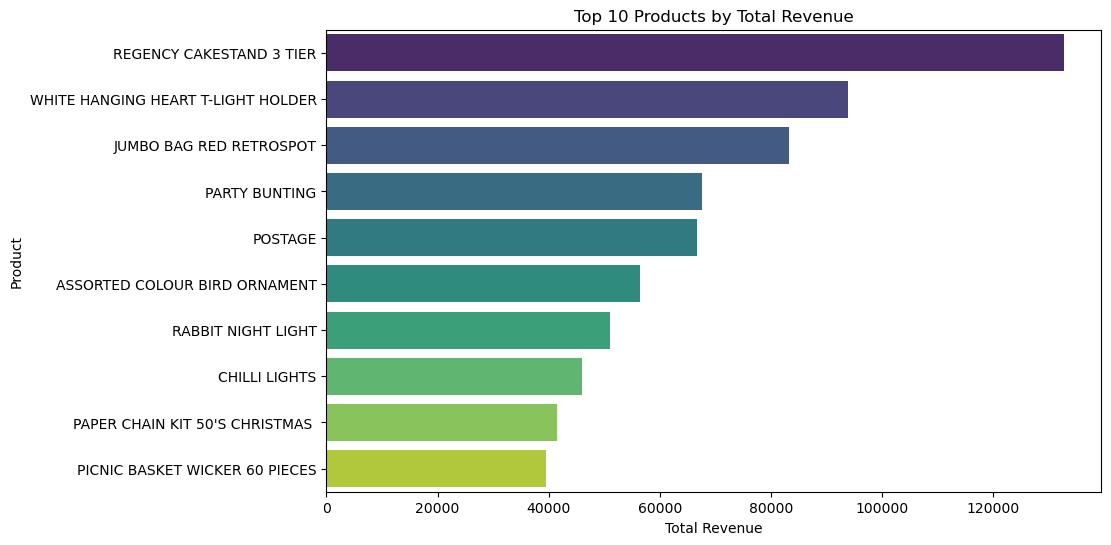

In [28]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Using Seaborn to create the bar plot
sns.barplot(x='TotalPrice', y='Product', data=top10, palette='viridis')

# Customize the plot
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')

# Show the plot
plt.show()

# Which products are frequently bought together ?

In [15]:
df.head(10)

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047,United Kingdom,54.08


In [16]:
#For this task we will need to see which product figure on the same invoice:

In [17]:
basket = df[df['InvoiceNo'].duplicated(keep = False)]
basket.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34


In [18]:
#Creating a new column that groups orders that figure on the same Invoice:

basket['Together'] = basket.groupby('InvoiceNo')['Product'].transform(lambda x: ','.join(x))

#Deleting Duplicates

basket = basket[["InvoiceNo",'Together']].drop_duplicates()

basket.head(10)


C:\Users\HTMuser\AppData\Local\Temp\ipykernel_14884\640625267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basket['Together'] = basket.groupby('InvoiceNo')['Product'].transform(lambda x: ','.join(x))


,InvoiceNo,Together
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
7,536366,"HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT"
9,536367,"ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUS..."
21,536368,"JAM MAKING SET WITH JARS,RED COAT RACK PARIS F..."
26,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
47,536372,"HAND WARMER RED POLKA DOT,HAND WARMER UNION JACK"
49,536373,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
66,536375,"WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL..."
82,536376,"HOT WATER BOTTLE TEA AND SYMPATHY,RED HANGING ..."
84,536377,"HAND WARMER RED POLKA DOT,HAND WARMER UNION JACK"


In [19]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in basket['Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('KEY FOB ', 'KEY FOB '), 650),
 (('KEY FOB ', ' BACK DOOR '), 454),
 (('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'), 449),
 (('KEY FOB ', ' SHED'), 430),
 (('KEY FOB ', ' FRONT  DOOR '), 352),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'), 330),
 (('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'),
  323),
 (('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'), 319),
 (('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'), 317),
 (('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '),
  311)]

In [38]:
mostcommon = pd.DataFrame(count.most_common(10))
mostcommon = mostcommon.rename(columns={0:'Combinations'})
mostcommon = mostcommon.rename(columns={1:'Frequency'})
mostcommon = mostcommon.drop(0)
mostcommon.head()

,Combinations,Frequency
1,"(KEY FOB , BACK DOOR )",454
2,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",449
3,"(KEY FOB , SHED)",430
4,"(KEY FOB , FRONT DOOR )",352
5,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",330


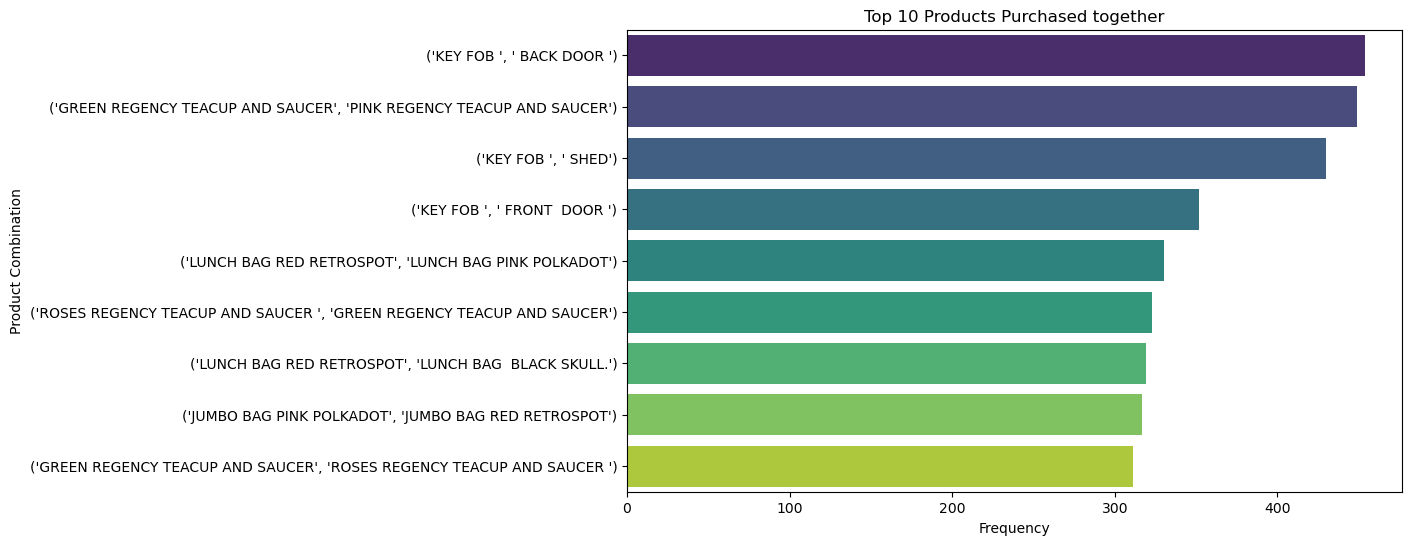

In [41]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Using Seaborn to create the bar plot
sns.barplot(x='Frequency', y='Combinations', data=mostcommon, palette='viridis')

# Customize the plot
plt.title('Top 10 Products Purchased together')
plt.xlabel('Frequency')
plt.ylabel('Product Combination')

# Show the plot
plt.show()

# Which country generates the most revenue ?

In [22]:
df.head()

,InvoiceNo,StockCode,Product,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34


In [48]:
revenue_coun = df.groupby('Country')['TotalPrice'].sum()

revenue_country = revenue_coun.reset_index()

revenue_country = revenue_country.sort_values(by = 'TotalPrice',ascending=False)

top10c = revenue_country.head(5)

top10c.head()

,Country,TotalPrice
35,United Kingdom,6767873.394
23,Netherlands,284661.540
10,EIRE,250285.220
14,Germany,221698.210
13,France,196712.840


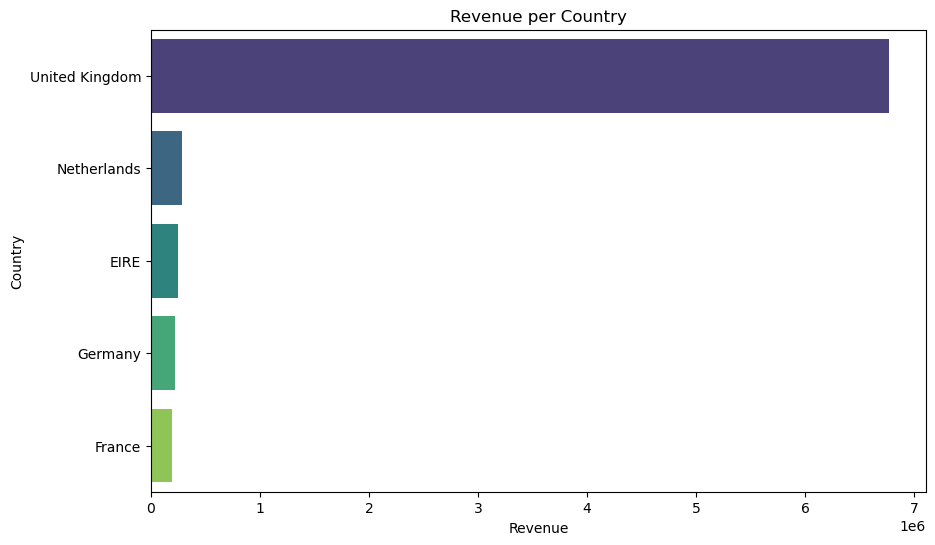

In [47]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Using Seaborn to create the bar plot
sns.barplot(x='TotalPrice', y='Country', data=top10c, palette='viridis')

# Customize the plot
plt.title('Revenue per Country')
plt.xlabel('Revenue')
plt.ylabel('Country')

# Show the plot
plt.show()

In [49]:
df.to_csv('Candy_bars.csv',index = False)